In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df1 = pd.read_csv('movies.csv')
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df2 = pd.read_csv('ratings.csv')
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df = pd.merge(df1, df2, on='movieId')

In [5]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


In [8]:
df.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


### Let's check the numbers of users and movies

In [9]:
num_users = df.userId.nunique()
num_movie = df.movieId.nunique()

print('No. of users: ' +str(num_users))
print('No. of movies: ' +str(num_movie))

No. of users: 610
No. of movies: 9724


### Let's check the data with few combinations

In [10]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [11]:
#let's check the total numbers of ratings for each movie
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [12]:
#let's create a new dataframe with title and ratings
df_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_ratings['no. of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
df_ratings.head()

,rating,no. of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


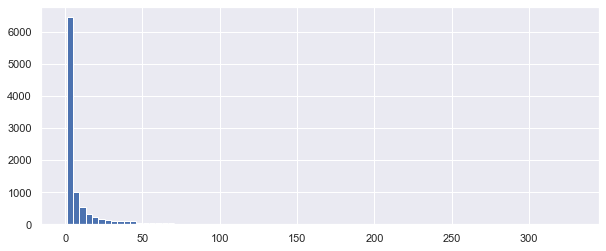

In [13]:
plt.figure(figsize=(10,4))
plt.hist(df_ratings['no. of ratings'], bins=80)
plt.show()

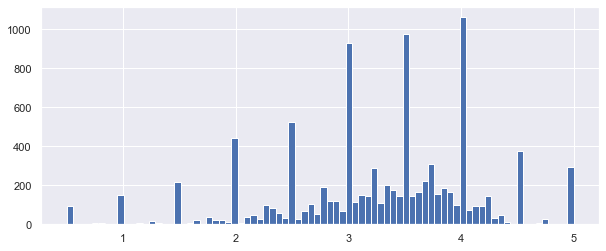

In [14]:
plt.figure(figsize=(10,4))
plt.hist(df_ratings['rating'], bins=80)
plt.show()

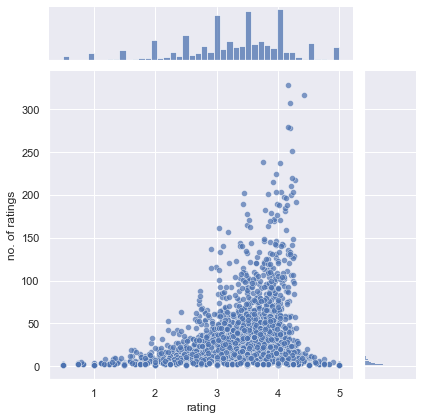

In [15]:
sns.jointplot(x='rating',y='no. of ratings',data=df_ratings,alpha=0.7)

In [16]:
df['genres'] = df['genres'].str.replace('|', ' ')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1,4.0,1970-01-01 00:00:00.964982703
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,1970-01-01 00:00:00.847434962
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,7,4.5,1970-01-01 00:00:01.106635946
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,15,2.5,1970-01-01 00:00:01.510577970
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,17,4.5,1970-01-01 00:00:01.305696483


In [37]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_ratings.sort_values('no. of ratings',ascending=False).head()

,rating,no. of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [40]:
ForrestGump_ratings = movie_matrix['Forrest Gump (1994)']
ShawshankRedemtion_ratings = movie_matrix['Shawshank Redemption, The (1994)']

In [41]:
sim_to_ForrestGump = movie_matrix.corrwith(ForrestGump_ratings)
sim_to_ShawshankRed = movie_matrix.corrwith(ShawshankRedemtion_ratings)

c:\python38\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python38\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


#### cleaning the NaN value

In [42]:
ForrestGump_corr = pd.DataFrame(sim_to_ForrestGump, columns=['Correlation'])
ForrestGump_corr.dropna(inplace=True)
ForrestGump_corr.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [43]:
ShawshankRed_corr = pd.DataFrame(sim_to_ShawshankRed, columns=['Correlation'])
ShawshankRed_corr.dropna(inplace=True)
ShawshankRed_corr.head()

,Correlation
title,
"'burbs, The (1989)",0.419543
(500) Days of Summer (2009),0.249580
*batteries not included (1987),0.404520
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.145671


#### Let's short the data by correlation

In [44]:
ForrestGump_corr.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [45]:
ShawshankRed_corr.sort_values('Correlation', ascending=False).head()

,Correlation
title,
"Principal, The (1987)",1.0
Chi-Raq (2015),1.0
Rififi (Du rififi chez les hommes) (1955),1.0
Robot & Frank (2012),1.0
Rock Star (2001),1.0


#### Now sort the value with no.of ratings more than 100

In [46]:
ForrestGump_corr = ForrestGump_corr.join(df_ratings['no. of ratings'])
ForrestGump_corr.head()

,Correlation,no. of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [50]:
ForrestGump_corr[ForrestGump_corr['no. of ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,no. of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


For Shawshank redemption

In [48]:
ShawshankRed_corr = ShawshankRed_corr.join(df_ratings['no. of ratings'])
ShawshankRed_corr.head()

,Correlation,no. of ratings
title,,
"'burbs, The (1989)",0.419543,17
(500) Days of Summer (2009),0.249580,42
*batteries not included (1987),0.404520,7
...And Justice for All (1979),-1.000000,3
10 Cloverfield Lane (2016),0.145671,14


In [53]:
ShawshankRed_corr[ShawshankRed_corr['no. of ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,no. of ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Four Weddings and a Funeral (1994),0.446212,103
Schindler's List (1993),0.402202,220
"Usual Suspects, The (1995)",0.394294,204
Ocean's Eleven (2001),0.391546,119
"Green Mile, The (1999)",0.382818,111
Inception (2010),0.377839,143
Catch Me If You Can (2002),0.356612,115
One Flew Over the Cuckoo's Nest (1975),0.354215,133
